#1.Rebuild, compile and train model_1, model_2 and model_5 using the Keras Sequential API instead of the Functional API.

## get the data

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

import zipfile
#Unzip the downloaded file
zip_ref = zipfile.ZipFile("nlp_getting_started.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-02 16:40:03--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.216.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-02-02 16:40:03 (137 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [4]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# shuffle training dataframe
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


## spliting to train and validation data

In [6]:
from sklearn.model_selection import train_test_split
#split training data into training and validation test
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

## Text vectorisation

In [16]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode ="int",
                                    output_sequence_length = max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

## Embedding

In [17]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length = max_length)

## Model 1: Feed forward neural network(dense model)

In [ ]:
# #Build model with FUnctional API
# from tensorflow.keras import layers
# inputs = layers.Input(shape=(1,),dtype = tf.string) #inputs are 1-dimensional strings
# x = text_vectorizer(inputs) #turn input text to numbers
# x = embedding(x) #create an embedding of the numberized inputs
# x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
# outputs = layers.Dense(1, activation="sigmoid")(x) # create output layer, want binary outputs so use sigmoid activation
# model_1 = tf.keras.Model(inputs,outputs, name="model_1_dense")

In [10]:
import tensorflow as tf

In [18]:
#1. creating model with sequential API
model_1 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])

In [19]:
#2. compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [20]:
#3. Fit the model
history_model_1 = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs = 5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 5s 19ms/step - loss: 0.6124 - accuracy: 0.6913 - val_loss: 0.5363 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4414 - accuracy: 0.8199 - val_loss: 0.4704 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3467 - accuracy: 0.8624 - val_loss: 0.4601 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2835 - accuracy: 0.8892 - val_loss: 0.4613 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2376 - accuracy: 0.9123 - val_loss: 0.4757 - val_accuracy: 0.7887


In [21]:
#evaluate the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.7887


[0.47565653920173645, 0.7887139320373535]

##Model 2: LSTM

In [ ]:
# #Create an LTSM model
# from tensorflow.keras import layers
# inputs = layers.Input(shape=(1,),dtype="string")
# x = text_vectorizer(inputs)
# x = embedding(x)
# # print(x.shape)
# # x = layers.LSTM(64,return_sequences=True)(x)
# # print(x.shape)
# x = layers.LSTM(64)(x)
# # print(x.shape)
# # x = layers.Dense(64, activation ="relu")(x)
# outputs = layers.Dense(1, activation ="sigmoid")(x)
# model_2 = tf.keras.Model(inputs,outputs, name = "model_2_LSTM")

In [22]:
#1. creating model with sequential API
model_2 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.LSTM(64) , 
    layers.Dense(1, activation = 'sigmoid')
    ])

In [25]:
#2. compile model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_model_2 = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 10s 32ms/step - loss: 0.2191 - accuracy: 0.9226 - val_loss: 0.5316 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.1559 - accuracy: 0.9406 - val_loss: 0.6311 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1258 - accuracy: 0.9527 - val_loss: 0.7566 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1064 - accuracy: 0.9604 - val_loss: 0.7341 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0855 - accuracy: 0.9670 - val_loss: 0.8330 - val_accuracy: 0.7756


In [26]:
#evaluate the results
model_2.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.8330 - accuracy: 0.7756


[0.8329950571060181, 0.7755905389785767]

## Model 5 : Conv1D

In [ ]:
# # Create 1-d convolutional layer to model sequences
# from tensorflow.keras import layers
# inputs = layers.Input(shape=(1,),dtype = tf.string)
# x = text_vectorizer(inputs)
# x = embedding(x)
# x = layers.Conv1D(filters=64,kernel_size=5,strides=1,activation="relu",padding="valid")(x)
# x = layers.GlobalMaxPool1D()(x)
# outputs = layers.Dense(1,activation="sigmoid")(x)
# model_5 = tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

In [27]:
#1. creating model with sequential API
model_5 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.Conv1D(filters=64,kernel_size=5,strides=1,activation="relu",padding="valid") , 
    layers.GlobalMaxPool1D(),
    layers.Dense(1, activation = 'sigmoid')
    ])

In [28]:
#2. compile model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model
history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 6s 21ms/step - loss: 0.1526 - accuracy: 0.9463 - val_loss: 0.7612 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1024 - accuracy: 0.9600 - val_loss: 0.8945 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0801 - accuracy: 0.9693 - val_loss: 0.9493 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0667 - accuracy: 0.9733 - val_loss: 1.0877 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0631 - accuracy: 0.9737 - val_loss: 1.0702 - val_accuracy: 0.7625


In [29]:
#evaluate the results
model_5.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.0702 - accuracy: 0.7625


[1.0701520442962646, 0.7624672055244446]

#2.Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [30]:
#Making a better dataset split
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

## Model_0: baseline model

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#create tokenuization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf",MultinomialNB())
])

#Fit the pipeline to the training data
model_0.fit(train_sentences_10_percent,train_labels_10_percent)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
#Evaluate the baseline model
baseline_score = model_0.score(val_sentences,val_labels)
baseline_score

0.7020997375328084

Conclusion: USE performs better on 10% of training data compared to baseline model

#3.Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer.

In [33]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [34]:
# Create keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True,
                                        name="USE")

In [35]:
#Create model using Sequential API
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_7_USE")

# model_7 = tf.keras.models.clone_model(model_6)

#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#summary
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 256,830,721
Non-trainable params: 0
_________________________________________________________________


In [36]:
#train a classifier on top of a USE pretrained model

model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
22/22 [==============================] - 61s 2s/step - loss: 0.6043 - accuracy: 0.7051 - val_loss: 0.5225 - val_accuracy: 0.7913
Epoch 2/5
22/22 [==============================] - 50s 2s/step - loss: 0.4019 - accuracy: 0.8277 - val_loss: 0.4734 - val_accuracy: 0.7992
Epoch 3/5
22/22 [==============================] - 50s 2s/step - loss: 0.2073 - accuracy: 0.9372 - val_loss: 0.5026 - val_accuracy: 0.7900
Epoch 4/5
22/22 [==============================] - 52s 2s/step - loss: 0.0759 - accuracy: 0.9810 - val_loss: 0.6024 - val_accuracy: 0.7585
Epoch 5/5
22/22 [==============================] - 50s 2s/step - loss: 0.0253 - accuracy: 0.9971 - val_loss: 0.7565 - val_accuracy: 0.7677


In [37]:
model_7.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 11ms/step - loss: 0.7565 - accuracy: 0.7677


[0.7565494775772095, 0.7677165269851685]

#4.Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?

In [38]:
train_sentences_full = train_df_shuffled['text'].to_numpy()
train_labels_full =  train_df_shuffled['target'].to_numpy() 

len(train_sentences_full) , len(train_labels_full)

(7613, 7613)

In [39]:
# Create model using the Sequential API
model_full = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(64 , activation ='relu'),
  layers.Dense(1, activation="sigmoid")
])

# Compile model
model_full.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
history_model_full =model_full.fit(train_sentences_full,
                              train_labels_full,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
238/238 [==============================] - 547s 2s/step - loss: 0.4095 - accuracy: 0.8295 - val_loss: 0.3044 - val_accuracy: 0.8635
Epoch 2/5
238/238 [==============================] - 533s 2s/step - loss: 0.2047 - accuracy: 0.9250 - val_loss: 0.1117 - val_accuracy: 0.9606
Epoch 3/5
238/238 [==============================] - 541s 2s/step - loss: 0.0729 - accuracy: 0.9765 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 4/5
238/238 [==============================] - 534s 2s/step - loss: 0.0400 - accuracy: 0.9859 - val_loss: 0.0336 - val_accuracy: 0.9895
Epoch 5/5
238/238 [==============================] - 533s 2s/step - loss: 0.0274 - accuracy: 0.9899 - val_loss: 0.0232 - val_accuracy: 0.9921


In [45]:
# Make predictions with the model
pred_probs = model_full.predict(val_sentences)

# Convert prediction probs to labels
preds = tf.squeeze(tf.round(pred_probs))
preds = tf.cast(preds , dtype = tf.int32)

24/24 [==============================] - 1s 21ms/step


In [46]:
len(preds)

762

In [44]:
len(val_sentences)

762

In [47]:
#Create DataFrame with validation sentences,validation labels and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": preds})
val_df.head()

,text,target,pred
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0
1,FedEx no longer to transport bioterror germs i...,0,0
2,Gunmen kill four in El Salvador bus attack: Su...,1,1
3,@camilacabello97 Internally and externally scr...,1,1
4,Radiation emergency #preparedness starts with ...,1,1


#5.Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?



*   model_2 : LSTM
*   model_5 : Conv1D
*   model_full : USE






## Predictions for each model

In [48]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [54]:
#Model_2 Predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(pred_probs))
model_2_preds = tf.cast(preds , dtype = tf.int32)
len(model_2_preds)

24/24 [==============================] - 0s 6ms/step


762

In [56]:
#Model_5 Predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(pred_probs))
model_5_preds = tf.cast(preds , dtype = tf.int32)
len(model_5_preds)

24/24 [==============================] - 0s 4ms/step


762

In [57]:
#Model_full Predictions
model_full_pred_probs = model_full.predict(val_sentences)
model_full_preds = tf.squeeze(tf.round(pred_probs))
model_full_preds = tf.cast(preds , dtype = tf.int32)
len(model_full_preds)

24/24 [==============================] - 1s 28ms/step


762

In [58]:
#Create DataFrame with validation sentences,validation labels and model predictions
majority_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "LSTM": model_2_preds,
                       "Conv1D" : model_5_preds,
                       "USE" : model_full_preds})
majority_df.head()

,text,target,LSTM,Conv1D,USE
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0,0,0
1,FedEx no longer to transport bioterror germs i...,0,0,0,0
2,Gunmen kill four in El Salvador bus attack: Su...,1,1,1,1
3,@camilacabello97 Internally and externally scr...,1,1,1,1
4,Radiation emergency #preparedness starts with ...,1,1,1,1


In [59]:
# Majority voted predictions of our model
majority_df['majority_vote_preds'] = majority_df.mode(axis = 1)
majority_df.head()

,text,target,LSTM,Conv1D,USE,majority_vote_preds
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0,0,0,0
1,FedEx no longer to transport bioterror germs i...,0,0,0,0,0
2,Gunmen kill four in El Salvador bus attack: Su...,1,1,1,1,1
3,@camilacabello97 Internally and externally scr...,1,1,1,1,1
4,Radiation emergency #preparedness starts with ...,1,1,1,1,1


#6.Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

In [60]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
#change to confusion matrix function to ensure xlabels print vertically
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ###Change (plot x-labels vertically)
  plt.xticks(rotation=70,fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [62]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [63]:
class_names = ["Not Disaster","Disaster"]

In [66]:
model_full_preds.shape

TensorShape([762])

In [65]:
val_labels.shape

(762,)

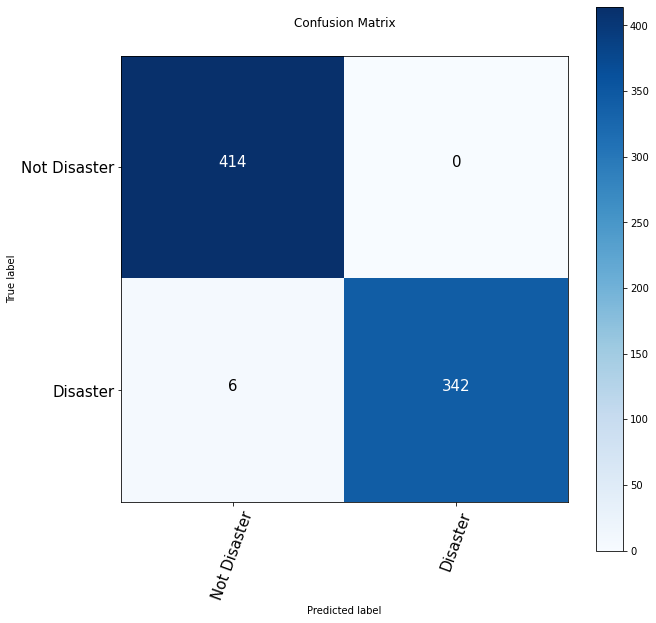

In [67]:
make_confusion_matrix(val_labels, model_full_preds, classes=class_names)